<a href="https://colab.research.google.com/github/SKM1978/Deep_Learning_Tutorial/blob/master/CNN_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building CNN on CIFAR dataset using Transfer Learning

## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()


## Loading the dataset

In [52]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [53]:
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [55]:
# Unique classes in the dataset

classes=np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [56]:
nclasses=len(classes)
nclasses

10

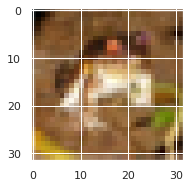

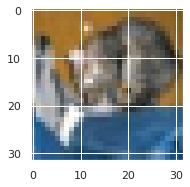

In [57]:
# Displaying the 1st image in dataset

plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.show()

plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.show()

## Displaying Images from each class

0


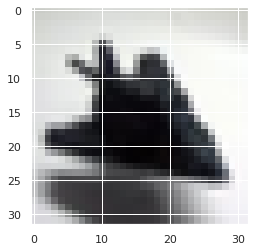

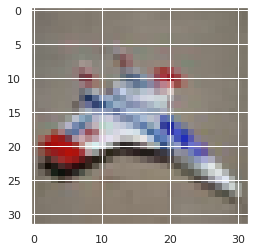

**************************************************
1


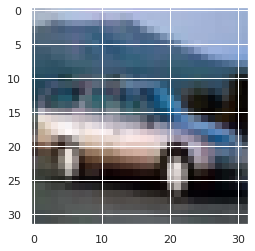

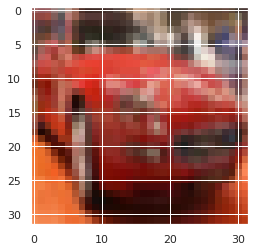

**************************************************
2


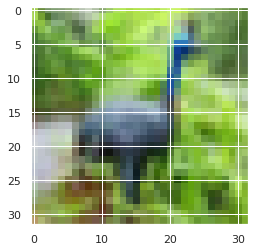

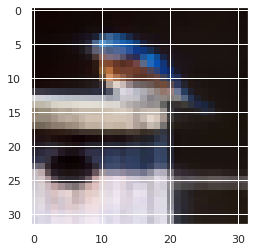

**************************************************
3


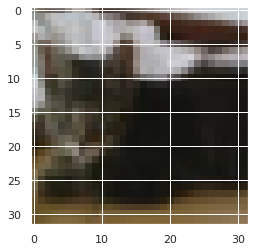

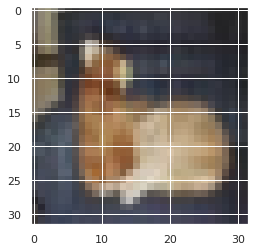

**************************************************
4


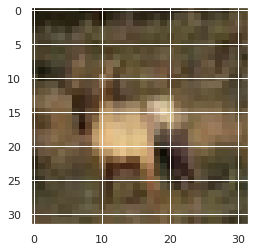

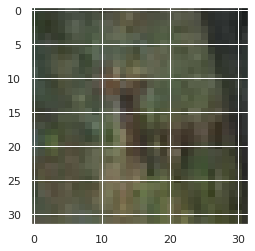

**************************************************
5


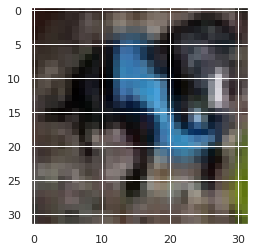

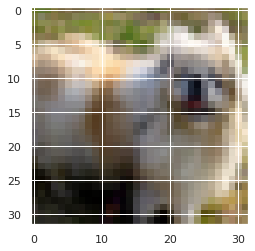

**************************************************
6


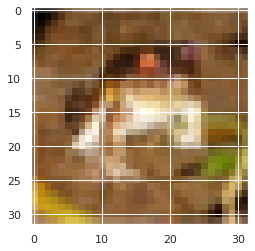

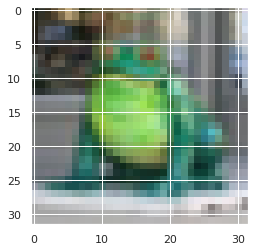

**************************************************
7


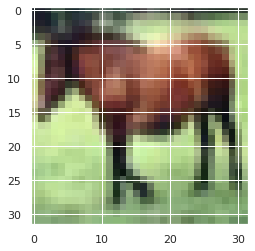

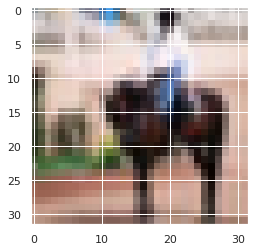

**************************************************
8


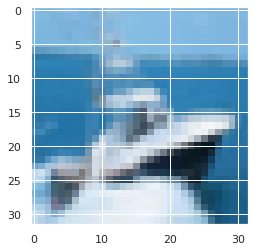

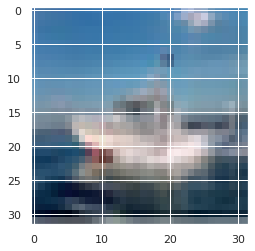

**************************************************
9


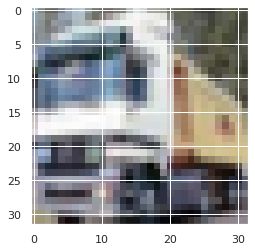

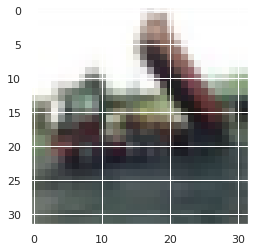

**************************************************


In [58]:
for category in np.unique(y_train):
  counter=2
  print(category)
  for idx, label in enumerate(y_train):
    if counter <1:
      break
    if label==category:
      
      counter-= 1
      plt.imshow(X_train[idx])
      plt.show()
  print("*"*50)

## Using simple ANN

In [60]:
# Loading the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

# Reshaping the data
X_train=X_train.reshape(-1, 32*32*3)
X_train=X_train/255.0

X_test=X_test.reshape(-1, 32*32*3)
X_test=X_test/255.0

y_train=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float64')
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float64')

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 3072), (10000, 3072), (50000, 10), (10000, 10))

### Model building

In [ ]:
model=Sequential()

# Input Layer
model.add(Dense(60, activation='relu', input_dim=3072))

# Hidden Layers
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))

# For using custom metrics
# https://keras.io/api/metrics/#custom-metrics

In [ ]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size=32, epochs=200, verbose=2)

# https://keras.io/api/models/model_training_apis/

In [ ]:
model.summary()

In [ ]:
history.history

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## 2nd ANN model

In [ ]:
model2=Sequential()

model2.add(Dense(800, activation='relu', input_dim=3072))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size=32, epochs=200, verbose=2)

In [ ]:
model2.summary()

In [ ]:
history2.history

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

## Using CNN

### Changing into float and Standardizing

In [ ]:
# Loading the dataset
(X_train, y_train),(X_test, y_test)=cifar10.load_data()


X_train=X_train/255.0
X_test=X_test/255.0

X_train.dtype, X_test.dtype


In [ ]:
y_train.shape, y_test.shape

### One Hot Encoding for y feature

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes=len(np.unique(y_train))
num_classes

In [ ]:
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

y_train.shape, y_test.shape

## Splitting the dataset into Training, Validation and Test

In [ ]:
y_valid=y_train[:10000]
y_train=y_train[10000:]

X_valid=X_train[:10000]
X_train=X_train[10000:]

X_train.shape, X_valid.shape, X_test.shape

In [ ]:
y_train.shape, y_valid.shape, y_test.shape

## CNN Model

In [ ]:
# Building a CNN model with Tensorflow

import tensorflow as tf

In [ ]:
cnn_model=tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, activation='relu', input_shape=(32,32,3)))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.summary()

# Building the ANN model on top

cnn_model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='uniform'))
cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='uniform'))
cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='uniform'))
cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='uniform'))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(180, activation='relu', kernel_initializer='uniform'))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(90, activation='relu', kernel_initializer='uniform'))

cnn_model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='uniform'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


## Fitting the CNN model

In [ ]:
answers=cnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=50, verbose=1)

## Evaluating the CNN model

In [ ]:
results=cnn_model.evaluate(X_test, y_test)
results

In [ ]:
answers.history.keys()

In [ ]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;

## Using Keras-Tuners

In [ ]:
def build_model(hp):
  model=keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=(3,5)),
        activation='relu',
        input_shape=(28,28,1)),

    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=(3,5)),
        activation='relu'),

    keras.layers.Flatten(),

    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'),

    keras.layers.Dense(10, activation='softmax')])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

  return model

## Using Random Search to find the best hyperparameters

In [ ]:
!pip install keras-tuner

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='output', project_name='cifar10_classification')

tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

# Building CNN using Transfer Learning

## Importing the libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Loading the dataset

In [64]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten 

In [65]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [67]:
x_train, x_train.dtype

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

## Standardizing the data

In [68]:
x_train=x_train/255.0

x_test=x_test/255.0

x_train.dtype, x_test.dtype, x_train.shape, x_test.shape

(dtype('float64'), dtype('float64'), (50000, 32, 32, 3), (10000, 32, 32, 3))

In [69]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## One Hot Encoding for y feature

In [70]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [71]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [72]:
num_class=len(np.unique(y_train))

In [73]:
y_train=to_categorical(y_train, num_class)
y_test=to_categorical(y_test, num_class)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

## Splitting the training data into training and validation

In [74]:
x_valid=x_train[40000:]
y_valid=y_train[40000:]

x_train=x_train[:40000]
y_train=y_train[:40000]

x_train.shape, x_valid.shape, x_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [75]:
y_train.shape, y_valid.shape, y_test.shape

((40000, 10), (10000, 10), (10000, 10))

## Transfer Learning - Resnet50

In [76]:
from keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout

In [77]:
# Import resnet as the base model
base_model=tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
''
# Use resnet model only for feature extraction and not for learning; we will freeze all the layers that we don't need
for layer in base_model.layers:
  layer.trainable=False

# Take the output of the base layers
base_model_output=base_model.output

# Add our own layers

## Pool layer
x=GlobalAveragePooling2D()(base_model_output)

## Flatten layer
x=Flatten()(x)

## FC layer
x=Dense(5000, activation='relu')(x)

## Dropout layer
x=Dropout(0.3)(x)

## Outer layer
x=Dense(10, activation='softmax')(x)

94781440/94765736 [==============================] - 1s 0us/step


In [78]:
# Initializing the resnet model

resnet_model=Model(inputs=base_model.input, outputs=x)

resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [79]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
resnet_model_history=resnet_model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
1250/1250 [==============================] - 54s 40ms/step - loss: 2.1936 - accuracy: 0.2103 - val_loss: 1.9749 - val_accuracy: 0.2703
Epoch 2/50
1250/1250 [==============================] - 50s 40ms/step - loss: 1.9960 - accuracy: 0.2614 - val_loss: 1.9247 - val_accuracy: 0.3034
Epoch 3/50
1250/1250 [==============================] - 50s 40ms/step - loss: 1.9630 - accuracy: 0.2756 - val_loss: 1.8937 - val_accuracy: 0.3077
Epoch 4/50
1250/1250 [==============================] - 48s 38ms/step - loss: 1.9406 - accuracy: 0.2878 - val_loss: 1.8587 - val_accuracy: 0.3155
Epoch 5/50
1250/1250 [==============================] - 49s 39ms/step - loss: 1.9101 - accuracy: 0.3009 - val_loss: 1.8460 - val_accuracy: 0.3282
Epoch 6/50
1250/1250 [==============================] - 50s 40ms/step - loss: 1.9005 - accuracy: 0.3056 - val_loss: 1.8256 - val_accuracy: 0.3500
Epoch 7/50
1250/1250 [==============================] - 48s 38ms/step - loss: 1.8907 - accuracy: 0.3081 - val_loss: 1.7937 -

## Evaluating the model

In [81]:
results=resnet_model.evaluate(x_test, y_test)
results

313/313 [==============================] - 9s 29ms/step - loss: 1.6987 - accuracy: 0.3880


[1.6986998319625854, 0.3880000114440918]

In [82]:
resnet_model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

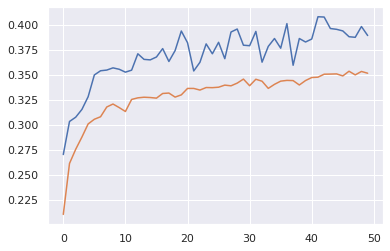

In [83]:
plt.plot(resnet_model_history.history['val_accuracy'],label='Validation Accuracy');
plt.plot(resnet_model_history.history['accuracy'],label='Training Accuracy');
plt.legend;

## Transfer Learning - VGG net

In [84]:
import tensorflow

from keras.models import Model, load_model
from keras.layers import GlobalAveragePooling2D, Dropout


vgg_model=tensorflow.keras.applications.VGG19(include_top=False, weights="imagenet", classifier_activation="softmax")

# Use resnet model only for feature extraction and not for learning; we will freeze all the layers that we don't need
for layer in vgg_model.layers:
  layer.trainable=False

# Take the output of the base layers
vgg_model_output=vgg_model.output

# Add our own layers

## Pool layer
x=GlobalAveragePooling2D()(vgg_model_output)

## Flatten layer
x=Flatten()(x)

## FC layer
x=Dense(5000, activation='relu')(x)

## Dropout layer
x=Dropout(0.3)(x)

## Outer layer
x=Dense(10, activation='softmax')(x)

In [85]:
# Initializing the VGG model

vgg_model=Model(inputs=vgg_model.input, outputs=x)

vgg_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [86]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model_history=vgg_model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 38s 29ms/step - loss: 1.4425 - accuracy: 0.4904 - val_loss: 1.3197 - val_accuracy: 0.5295
Epoch 2/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.2833 - accuracy: 0.5489 - val_loss: 1.2617 - val_accuracy: 0.5489
Epoch 3/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.2204 - accuracy: 0.5714 - val_loss: 1.2239 - val_accuracy: 0.5682
Epoch 4/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.1687 - accuracy: 0.5863 - val_loss: 1.1811 - val_accuracy: 0.5829
Epoch 5/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1302 - accuracy: 0.5979 - val_loss: 1.1911 - val_accuracy: 0.5824
Epoch 6/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.0939 - accuracy: 0.6152 - val_loss: 1.1750 - val_accuracy: 0.5840
Epoch 7/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.0610 - accuracy: 0.6245 - val_loss: 1.1439 -

## Evaluating the VGG model

In [87]:
vgg_results=vgg_model.evaluate(x_test, y_test)
vgg_results

313/313 [==============================] - 8s 24ms/step - loss: 1.1745 - accuracy: 0.6031


[1.1744790077209473, 0.6031000018119812]

In [88]:
vgg_model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

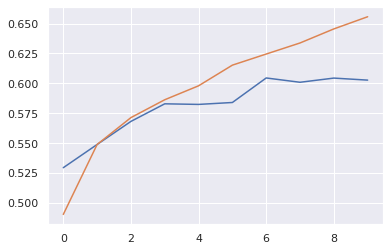

In [89]:
plt.plot(vgg_model_history.history['val_accuracy'],label='Validation Accuracy');
plt.plot(vgg_model_history.history['accuracy'],label='Training Accuracy');
plt.legend;

## Transfer Learning - VGG net with Batch Normalization

In [90]:
import tensorflow

from keras.models import Model, load_model
from keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization


vgg_model=tensorflow.keras.applications.VGG19(include_top=False, weights="imagenet", classifier_activation="softmax")

# Use resnet model only for feature extraction and not for learning; we will freeze all the layers that we don't need
for layer in vgg_model.layers:
  layer.trainable=False

# Take the output of the base layers
vgg_model_output=vgg_model.output

# Add our own layers

## Pool layer
x=GlobalAveragePooling2D()(vgg_model_output)

## Flatten layer
x=Flatten()(x)

## Batch Normalization layer
x=BatchNormalization()(x)

## FC layer
x=Dense(5000, activation='relu')(x)

## Batch Normalization layer
x=BatchNormalization()(x)

## Dropout layer
x=Dropout(0.3)(x)

## Outer layer
x=Dense(10, activation='softmax')(x)

In [91]:
# Initializing the VGG model with batch normalization

vgg_model_bn=Model(inputs=vgg_model.input, outputs=x)

vgg_model_bn.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [92]:
vgg_model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model_bn_history=vgg_model_bn.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 40s 31ms/step - loss: 2.2492 - accuracy: 0.4370 - val_loss: 1.7003 - val_accuracy: 0.5095
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.7839 - accuracy: 0.4835 - val_loss: 1.7979 - val_accuracy: 0.5037
Epoch 3/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.6047 - accuracy: 0.5143 - val_loss: 1.6508 - val_accuracy: 0.5264
Epoch 4/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5077 - accuracy: 0.5308 - val_loss: 1.4510 - val_accuracy: 0.5503
Epoch 5/10
1250/1250 [==============================] - 38s 31ms/step - loss: 1.3001 - accuracy: 0.5680 - val_loss: 1.5103 - val_accuracy: 0.5519
Epoch 7/10
1250/1250 [==============================] - 38s 31ms/step - loss: 1.2413 - accuracy: 0.5790 - val_loss: 1.4792 - val_accuracy: 0.5589
Epoch 8/10
1250/1250 [==============================] - 38s 31ms/step - loss: 1.1974 - accuracy: 0.5938 - val_loss: 1.4825 -

## Evaluating the VGG model with Batch Normalization

In [94]:
vgg_bn_results=vgg_model_bn.evaluate(x_test, y_test)
vgg_bn_results

313/313 [==============================] - 7s 24ms/step - loss: 1.5212 - accuracy: 0.5803


[1.521194338798523, 0.580299973487854]

In [95]:
vgg_model_bn_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

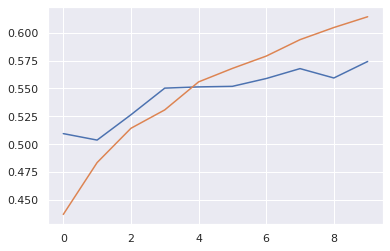

In [96]:
plt.plot(vgg_model_bn_history.history['val_accuracy'],label='Validation Accuracy');
plt.plot(vgg_model_bn_history.history['accuracy'],label='Training Accuracy');
plt.legend;